## 一、numpy基础
numpy是高效的数值计算和数据分析的基础包，其核心是称为ndarray的数据类型，一种多维数组，能够进行快速的算术和矩阵运算。
![](images/python-ecosystem.png?20170628)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
np.random.seed(12345)
%matplotlib inline

In [2]:
data = np.random.randn(2, 3) #随机生成符合正态分布的样本数据
data

array([[-0.20470766,  0.47894334, -0.51943872],
       [-0.5557303 ,  1.96578057,  1.39340583]])

In [3]:
print(data.shape) #每个维度大小
print(data.ndim) #轴的个数，也称作秩
print(data.dtype)
print(data.itemsize) #每个元素的字节数
print(data.size) #元素个数
print(type(data))

(2, 3)
2
float64
8
6
<class 'numpy.ndarray'>


### 1. 创建ndarray
从列表中创建

In [4]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([ 6. ,  7.5,  8. ,  0. ,  1. ])

In [5]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [6]:
print(arr2.ndim)
print(arr2.shape)

2
(2, 4)


从内置函数中创建

In [7]:
np.zeros(10)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [8]:
np.zeros((3, 6))

array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

In [9]:
np.empty((2, 3, 4))

array([[[  1.02986685e-311,   7.75683064e-322,   0.00000000e+000,
           0.00000000e+000],
        [  1.89146896e-307,   1.15998412e-028,   2.44171989e+232,
           8.00801729e+159],
        [  3.35733962e-090,   7.27134449e-043,   2.40461215e-057,
           9.45698627e-096]],

       [[  4.01335183e-057,   4.07356335e+223,   8.94213159e+130,
           5.64151416e-062],
        [  3.44353323e-086,   9.50118823e-043,   6.12576209e-062,
           1.95360938e-109],
        [  2.86752281e+161,   2.78225500e+296,   9.80058441e+252,
           1.23971686e+224]]])

In [10]:
np.ones((2, 3))

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [11]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

### 2. ndarray中的数据类型

In [12]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)
print(arr1)
print(arr2)

[ 1.  2.  3.]
[1 2 3]


In [13]:
arr = np.array([1, 2, 3, 4, 5])
arr.dtype
float_arr = arr.astype(np.float64)
float_arr

array([ 1.,  2.,  3.,  4.,  5.])

In [14]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
numeric_strings.astype(float) #自动映射为np.float64

array([  1.25,  -9.6 ,  42.  ])

In [15]:
int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
int_array.astype(calibers.dtype)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

### 3. ndarray的广播运算

In [16]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.]])

In [17]:
arr * arr

array([[  1.,   4.,   9.],
       [ 16.,  25.,  36.]])

In [18]:
arr - arr

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [19]:
1 / arr

array([[ 1.        ,  0.5       ,  0.33333333],
       [ 0.25      ,  0.2       ,  0.16666667]])

In [20]:
arr ** 0.5

array([[ 1.        ,  1.41421356,  1.73205081],
       [ 2.        ,  2.23606798,  2.44948974]])

### 4. ndarray的索引和切片

In [21]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [22]:
arr[5]

5

In [23]:
arr[5:8]

array([5, 6, 7])

In [24]:
arr[5:8] = 12 #赋值广播到整个选区
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [25]:
arr_slice = arr[5:8] #数组切片是原始数组的视图，数据没有被复制
arr_slice[1] = 12345
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,     9])

In [26]:
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [27]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2]

array([7, 8, 9])

In [28]:
arr2d[0][2]
arr2d[0, 2]

3

In [29]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [30]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [31]:
old_values = arr3d[0].copy()
arr3d[0] = 42
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [32]:
arr3d[0] = old_values
arr3d[1, 0]

array([7, 8, 9])

In [33]:
arr[1:6]

array([ 1,  2,  3,  4, 64])

In [34]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [35]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [36]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

In [37]:
arr2d[1, :2]

array([4, 5])

In [38]:
arr2d[2, :1]

array([7])

In [39]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

In [40]:
arr2d[:2, 1:] = 0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

布尔型索引

In [41]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)
data

array([[ 0.09290788,  0.28174615,  0.76902257,  1.24643474],
       [ 1.00718936, -1.29622111,  0.27499163,  0.22891288],
       [ 1.35291684,  0.88642934, -2.00163731, -0.37184254],
       [ 1.66902531, -0.43856974, -0.53974145,  0.47698501],
       [ 3.24894392, -1.02122752, -0.5770873 ,  0.12412128],
       [ 0.30261356,  0.52377207,  0.00094028,  1.34380979],
       [-0.71354399, -0.83115354, -2.37023165, -1.86076079]])

In [42]:
data[names == 'Bob']

array([[ 0.09290788,  0.28174615,  0.76902257,  1.24643474],
       [ 1.66902531, -0.43856974, -0.53974145,  0.47698501]])

In [43]:
data[names == 'Bob', 2:]

array([[ 0.76902257,  1.24643474],
       [-0.53974145,  0.47698501]])

In [44]:
data[~(names == 'Bob')]

array([[ 1.00718936, -1.29622111,  0.27499163,  0.22891288],
       [ 1.35291684,  0.88642934, -2.00163731, -0.37184254],
       [ 3.24894392, -1.02122752, -0.5770873 ,  0.12412128],
       [ 0.30261356,  0.52377207,  0.00094028,  1.34380979],
       [-0.71354399, -0.83115354, -2.37023165, -1.86076079]])

In [45]:
data[(names == 'Bob') | (names == 'Will')]

array([[ 0.09290788,  0.28174615,  0.76902257,  1.24643474],
       [ 1.35291684,  0.88642934, -2.00163731, -0.37184254],
       [ 1.66902531, -0.43856974, -0.53974145,  0.47698501],
       [ 3.24894392, -1.02122752, -0.5770873 ,  0.12412128]])

In [46]:
data[names != 'Joe'] = 7
data

array([[ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 1.00718936, -1.29622111,  0.27499163,  0.22891288],
       [ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 0.30261356,  0.52377207,  0.00094028,  1.34380979],
       [-0.71354399, -0.83115354, -2.37023165, -1.86076079]])

In [47]:
data[data < 0] = 0
data

array([[ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 1.00718936,  0.        ,  0.27499163,  0.22891288],
       [ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 0.30261356,  0.52377207,  0.00094028,  1.34380979],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

### 5. ndarray矩阵运算

In [48]:
arr = np.arange(15).reshape((3, 5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [49]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [50]:
np.dot(arr.T, arr)

array([[125, 140, 155, 170, 185],
       [140, 158, 176, 194, 212],
       [155, 176, 197, 218, 239],
       [170, 194, 218, 242, 266],
       [185, 212, 239, 266, 293]])

### 6. 内置函数
abs, fabs, sqrt, square, exp, log, log10, log2, ceil, floor ...

In [51]:
arr = np.arange(10)
np.sqrt(arr) #开方

array([ 0.        ,  1.        ,  1.41421356,  1.73205081,  2.        ,
        2.23606798,  2.44948974,  2.64575131,  2.82842712,  3.        ])

In [52]:
np.exp(arr) #e的指数幂

array([    1.        ,     2.71828183,     7.3890561 ,    20.08553692,
          54.59815003,   148.4131591 ,   403.42879349,  1096.63315843,
        2980.95798704,  8103.08392758])

In [53]:
x = np.random.randn(8)
y = np.random.randn(8)
np.maximum(x, y) #最大值

array([-0.8607574 ,  0.56014529, -1.26593449,  0.28634975,  0.37798411,
        0.33288272,  0.33128565,  1.34974221])

In [54]:
arr = np.random.randn(7) * 5
np.modf(arr) #拆分小数和整数

(array([ 0.34938344,  0.23337055, -0.05930801,  0.02405795,  0.63597307,
        -0.59630779, -0.74553219]), array([ 0.,  1., -0.,  5.,  6., -4., -7.]))

In [55]:
points = np.arange(-5, 5, 1)
xs, ys = np.meshgrid(points, points)
ys

array([[-5, -5, -5, -5, -5, -5, -5, -5, -5, -5],
       [-4, -4, -4, -4, -4, -4, -4, -4, -4, -4],
       [-3, -3, -3, -3, -3, -3, -3, -3, -3, -3],
       [-2, -2, -2, -2, -2, -2, -2, -2, -2, -2],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2],
       [ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3],
       [ 4,  4,  4,  4,  4,  4,  4,  4,  4,  4]])

In [56]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[ 7.07106781,  6.40312424,  5.83095189,  5.38516481,  5.09901951,
         5.        ,  5.09901951,  5.38516481,  5.83095189,  6.40312424],
       [ 6.40312424,  5.65685425,  5.        ,  4.47213595,  4.12310563,
         4.        ,  4.12310563,  4.47213595,  5.        ,  5.65685425],
       [ 5.83095189,  5.        ,  4.24264069,  3.60555128,  3.16227766,
         3.        ,  3.16227766,  3.60555128,  4.24264069,  5.        ],
       [ 5.38516481,  4.47213595,  3.60555128,  2.82842712,  2.23606798,
         2.        ,  2.23606798,  2.82842712,  3.60555128,  4.47213595],
       [ 5.09901951,  4.12310563,  3.16227766,  2.23606798,  1.41421356,
         1.        ,  1.41421356,  2.23606798,  3.16227766,  4.12310563],
       [ 5.        ,  4.        ,  3.        ,  2.        ,  1.        ,
         0.        ,  1.        ,  2.        ,  3.        ,  4.        ],
       [ 5.09901951,  4.12310563,  3.16227766,  2.23606798,  1.41421356,
         1.        ,  1.41421356,  2.23606798

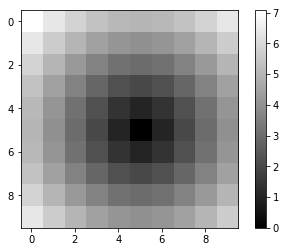

In [57]:
plt.imshow(z, cmap=plt.cm.gray)
plt.colorbar()

三元运算

In [58]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [59]:
result = np.where(cond, xarr, yarr)
result

array([ 1.1,  2.2,  1.3,  1.4,  2.5])

In [60]:
arr = np.random.randn(4, 4)
arr
np.where(arr > 0, 2, -2)

array([[ 2,  2, -2,  2],
       [-2,  2,  2,  2],
       [-2, -2, -2, -2],
       [-2, -2,  2,  2]])

In [61]:
np.where(arr > 0, 2, arr)

array([[ 2.        ,  2.        , -0.66052433,  2.        ],
       [-0.0100319 ,  2.        ,  2.        ,  2.        ],
       [-0.95586885, -0.02349332, -2.30423388, -0.65246884],
       [-1.21830198, -1.33260971,  2.        ,  2.        ]])

统计函数

In [62]:
arr = np.random.randn(5, 4)
arr

array([[ 0.69000185,  1.00154344, -0.50308739, -0.62227423],
       [-0.92116861, -0.72621349,  0.22289555,  0.0513161 ],
       [-1.15771947,  0.81670694,  0.43360961,  1.01073695],
       [ 1.82487521, -0.99751825,  0.8505911 , -0.1315776 ],
       [ 0.91241415,  0.18821068,  2.16946144, -0.1149282 ]])

In [63]:
arr.mean()
np.mean(arr)

0.24989378864734652

In [64]:
arr.sum()

4.9978757729469301

In [65]:
arr.mean(axis=1)

array([ 0.14154592, -0.34329261,  0.27583351,  0.38659262,  0.78878952])

In [66]:
arr.sum(0)

array([ 1.34840314,  0.28272932,  3.1734703 ,  0.19327302])

In [67]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [68]:
arr.cumsum(0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]], dtype=int32)

In [69]:
arr.cumprod(1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]], dtype=int32)

排序

In [70]:
arr = np.random.randn(8)
arr

array([ 2.00369736,  0.02961015,  0.79525316,  0.11810975, -0.74853155,
        0.58496974,  0.15267657, -1.56565729])

In [71]:
arr.sort()
arr

array([-1.56565729, -0.74853155,  0.02961015,  0.11810975,  0.15267657,
        0.58496974,  0.79525316,  2.00369736])

In [72]:
arr = np.random.randn(5, 3)
arr

array([[-0.56254019, -0.03266414, -0.9290062 ],
       [-0.48257265, -0.03626385,  1.09539006],
       [ 0.98092848, -0.58948769,  1.58170009],
       [-0.52873483,  0.45700187,  0.92996876],
       [-1.56927061, -1.02248698, -0.40282692]])

In [73]:
arr.sort(1)
arr

array([[-0.9290062 , -0.56254019, -0.03266414],
       [-0.48257265, -0.03626385,  1.09539006],
       [-0.58948769,  0.98092848,  1.58170009],
       [-0.52873483,  0.45700187,  0.92996876],
       [-1.56927061, -1.02248698, -0.40282692]])

In [74]:
large_arr = np.random.randn(1000)
large_arr.sort()
large_arr[int(0.05 * len(large_arr))]

-1.5311513550102103

### 练习1：随机漫步
使用python标准库

In [75]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

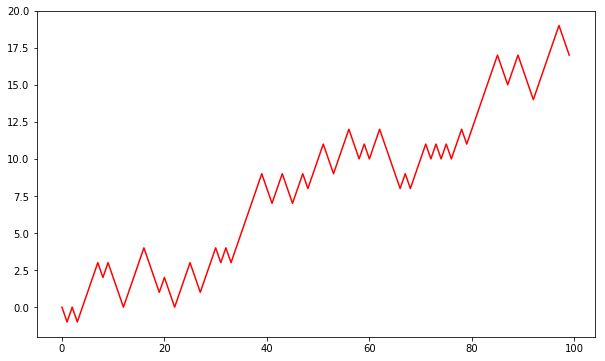

In [76]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(100), walk[:100], 'r')
plt.show()

使用numpy改写

In [77]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

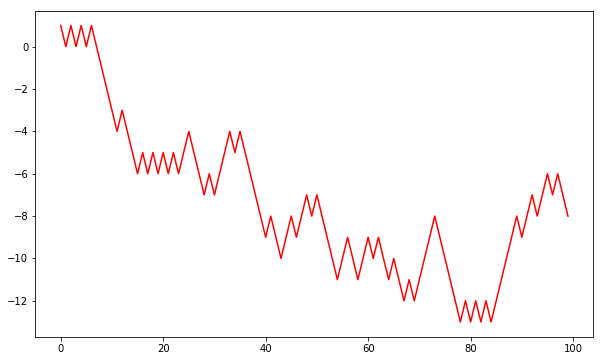

In [78]:
plt.figure(figsize=(10,6))
plt.plot(range(100), walk[:100], 'r')
plt.show()

### 练习2：生成正态分布样本数据

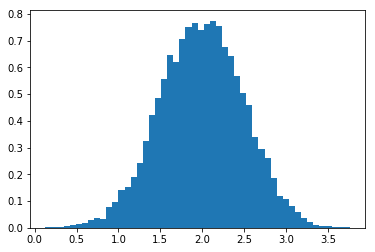

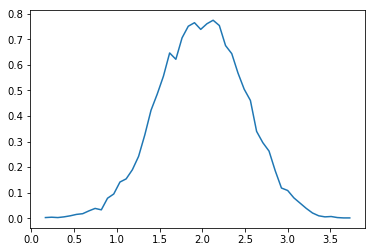

In [79]:
mu, sigma = 2, 0.5
v = np.random.normal(mu, sigma, 10000)
plt.hist(v, bins=50, normed=1) #使用matpotlib处理数据
plt.show()
(n, bins) = np.histogram(v, bins=50, normed=True)  #使用numpy处理数据
plt.plot(.5*(bins[1:]+bins[:-1]), n)
plt.show()

## 二、pandas基础
pandas基于numpy构建，其核心包括序列Series和数据框DataFrame两种是数据类型。
- Series类似于numpy中的一维数组
- DataFrame类似于numpy中的二维数组


In [80]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
np.set_printoptions(suppress=True)
np.random.seed(12345)
%matplotlib inline

### 1. Series

In [81]:
obj = Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [82]:
obj.values

array([ 4,  7, -5,  3], dtype=int64)

In [83]:
obj.index

RangeIndex(start=0, stop=4, step=1)

In [84]:
obj2 = Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [85]:
obj2.index

Index(['d', 'b', 'a', 'c'], dtype='object')

In [86]:
obj2['a']

-5

In [87]:
obj2['d'] = 6

In [88]:
obj2[['c', 'a', 'd']]

c    3
a   -5
d    6
dtype: int64

In [89]:
obj2[obj2 > 0]

d    6
b    7
c    3
dtype: int64

In [90]:
obj2 * 2

d    12
b    14
a   -10
c     6
dtype: int64

In [91]:
np.exp(obj2)

d     403.428793
b    1096.633158
a       0.006738
c      20.085537
dtype: float64

In [92]:
'b' in obj2

True

In [93]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3 = Series(sdata)
obj3

Ohio      35000
Oregon    16000
Texas     71000
Utah       5000
dtype: int64

In [94]:
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = Series(sdata, index=states)
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [95]:
pd.isnull(obj4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [96]:
pd.notnull(obj4)

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

In [97]:
obj4.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [98]:
obj3

Ohio      35000
Oregon    16000
Texas     71000
Utah       5000
dtype: int64

In [99]:
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [100]:
obj3 + obj4

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

In [101]:
obj4.name = 'population'
obj4.index.name = 'state'
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

In [102]:
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan']
obj

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64

### 2. DataFrame

In [103]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9]}
frame = DataFrame(data)
frame

,pop,state,year
0,1.5,Ohio,2000
1,1.7,Ohio,2001
2,3.6,Ohio,2002
3,2.4,Nevada,2001
4,2.9,Nevada,2002


In [104]:
frame2 = DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                   index=['one', 'two', 'three', 'four', 'five'])
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN


In [105]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

In [106]:
frame2['state']

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
Name: state, dtype: object

In [107]:
frame2.year

one      2000
two      2001
three    2002
four     2001
five     2002
Name: year, dtype: int64

In [108]:
frame2.ix['three']

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

In [109]:
frame2['debt'] = 16.5
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5


In [110]:
val = Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])
frame2['debt'] = val
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7


In [111]:
frame2['eastern'] = frame2.state == 'Ohio'
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False


In [112]:
del frame2['eastern']
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

In [113]:
pop = {'Nevada': {2001: 2.4, 2002: 2.9},
       'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

In [114]:
frame3 = DataFrame(pop)
frame3

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [115]:
frame3.T

,2000,2001,2002
Nevada,NaN,2.4,2.9
Ohio,1.5,1.7,3.6


In [116]:
DataFrame(pop, index=[2001, 2002, 2003])

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


In [117]:
pdata = {'Ohio': frame3['Ohio'][:-1],
         'Nevada': frame3['Nevada'][:2]}
DataFrame(pdata)

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7


In [118]:
frame3.index.name = 'year'; frame3.columns.name = 'state'
frame3

state,Nevada,Ohio
year,,
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


### 3. 索引
丢弃行或列

In [119]:
obj = Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
new_obj = obj.drop('c')
new_obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [120]:
obj.drop(['d', 'c'])

a    0.0
b    1.0
e    4.0
dtype: float64

In [121]:
data = DataFrame(np.arange(16).reshape((4, 4)),
                 index=['Ohio', 'Colorado', 'Utah', 'New York'],
                 columns=['one', 'two', 'three', 'four'])

In [122]:
data.drop(['Colorado', 'Ohio'])

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


In [123]:
data.drop('two', axis=1)

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


In [124]:
data.drop(['two', 'four'], axis=1)

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


索引数据

In [125]:
obj = Series(np.arange(4.), index=['a', 'b', 'c', 'd'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [126]:
obj['b']

1.0

In [127]:
obj[1]

1.0

In [128]:
obj[2:4]

c    2.0
d    3.0
dtype: float64

In [129]:
obj[['b', 'a', 'd']]

b    1.0
a    0.0
d    3.0
dtype: float64

In [130]:
obj[[1, 3]]

b    1.0
d    3.0
dtype: float64

In [131]:
obj[obj < 2]

a    0.0
b    1.0
dtype: float64

In [132]:
obj['b':'c']

b    1.0
c    2.0
dtype: float64

In [133]:
obj['b':'c'] = 5
obj

a    0.0
b    5.0
c    5.0
d    3.0
dtype: float64

In [134]:
data = DataFrame(np.arange(16).reshape((4, 4)),
                 index=['Ohio', 'Colorado', 'Utah', 'New York'],
                 columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [135]:
data['two']

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int32

In [136]:
data[['three', 'one']]

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
New York,14,12


In [137]:
data[:2] #切片选取的是行

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [138]:
data[data['three'] > 5]  #布尔型数组选取的是行

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [139]:
data.ix['Colorado', ['two', 'three']]

two      5
three    6
Name: Colorado, dtype: int32

In [140]:
data.ix[['Colorado', 'Utah'], [3, 0, 1]]

,four,one,two
Colorado,7,4,5
Utah,11,8,9


In [141]:
data.ix[2] #没有data[2]

one       8
two       9
three    10
four     11
Name: Utah, dtype: int32

In [142]:
data.ix[:'Utah', 'two']

Ohio        1
Colorado    5
Utah        9
Name: two, dtype: int32

In [143]:
data.ix[data.three > 5, :3]

,one,two,three
Colorado,4,5,6
Utah,8,9,10
New York,12,13,14


## 4. 运算

In [144]:
s1 = Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s2 = Series([-2.1, 3.6, -1.5, 4, 3.1], index=['a', 'c', 'e', 'f', 'g'])
s1

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [145]:
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

In [146]:
s1 + s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

In [147]:
df1 = DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),
                index=['Ohio', 'Texas', 'Colorado'])
df2 = DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                index=['Utah', 'Ohio', 'Texas', 'Oregon'])
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [148]:
df2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [149]:
df1 + df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


In [150]:
df1 = DataFrame(np.arange(12.).reshape((3, 4)), columns=list('abcd'))
df2 = DataFrame(np.arange(20.).reshape((4, 5)), columns=list('abcde'))
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [151]:
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [152]:
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,11.0,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [153]:
df1.add(df2, fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,11.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [154]:
df1.reindex(columns=df2.columns, fill_value=0) #重建索引

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,0
1,4.0,5.0,6.0,7.0,0
2,8.0,9.0,10.0,11.0,0


In [155]:
arr = np.arange(12.).reshape((3, 4))
arr

array([[  0.,   1.,   2.,   3.],
       [  4.,   5.,   6.,   7.],
       [  8.,   9.,  10.,  11.]])

In [156]:
arr[0]

array([ 0.,  1.,  2.,  3.])

In [157]:
arr - arr[0]  #numpy中的广播运算

array([[ 0.,  0.,  0.,  0.],
       [ 4.,  4.,  4.,  4.],
       [ 8.,  8.,  8.,  8.]])

In [158]:
frame = DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                  index=['Utah', 'Ohio', 'Texas', 'Oregon'])
series = frame.ix[0]
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [159]:
series

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

In [160]:
frame - series #DataFrame与Series的运算

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


In [161]:
series2 = Series(range(3), index=['b', 'e', 'f'])
series2

b    0
e    1
f    2
dtype: int32

In [162]:
frame + series2

,b,d,e,f
Utah,0.0,NaN,3.0,NaN
Ohio,3.0,NaN,6.0,NaN
Texas,6.0,NaN,9.0,NaN
Oregon,9.0,NaN,12.0,NaN


In [163]:
series3 = frame['d']
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [164]:
series3

Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64

In [165]:
frame.sub(series3, axis=0)

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0
